Short press info - 46 categories

In [1]:
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import reuters
from keras.utils import to_categorical
import numpy as np
import sys
import os
sys.path.append('../')
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from utils import acc_plot, loss_plot

2023-03-09 13:00:33.585430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 13:00:33.648809: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000) 

In [3]:
len(set(y_train))

46

In [4]:
X_train[0][:10] # word indexes again - transformation needed e.g. one-hot encoding (to_categorical)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
X_test = vectorize_sequences(X_test)
X_train = vectorize_sequences(X_train)

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(10000,)),
    Dense(64, activation='relu'),
    Dense(46, activation='softmax')
])

2023-03-09 13:00:35.496827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-09 13:00:35.496871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-09 13:00:35.496896: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-09 13:00:35.497044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-09 13:00:35.497067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-09 13:00:35.497072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-09 13:00:35.497335: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neu

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
X_val = X_train[:1000]
X_train = X_train[1000:]

y_val = y_train[:1000]
y_train = y_train[1000:]

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 3.3008 - accuracy: 0.3311 - val_loss: 2.6379 - val_accuracy: 0.4690
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 2.0976 - accuracy: 0.5930 - val_loss: 1.7222 - val_accuracy: 0.6370
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4171 - accuracy: 0.6954 - val_loss: 1.3325 - val_accuracy: 0.7020
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0846 - accuracy: 0.7603 - val_loss: 1.1432 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8603 - accuracy: 0.8132 - val_loss: 1.0486 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6786 - accuracy: 0.8507 - val_loss: 0.9811 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5377 - accuracy: 0.8836 - val_loss: 0.9442 - val_accuracy: 0.8030
Epoch 8/20
16/16 

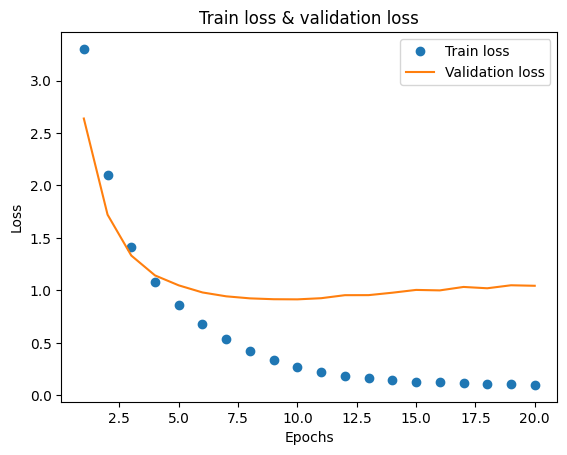

In [12]:
history_dict = history.history
loss_plot(history_dict)

Loss stops decreasing somewhere around 9 epochs.

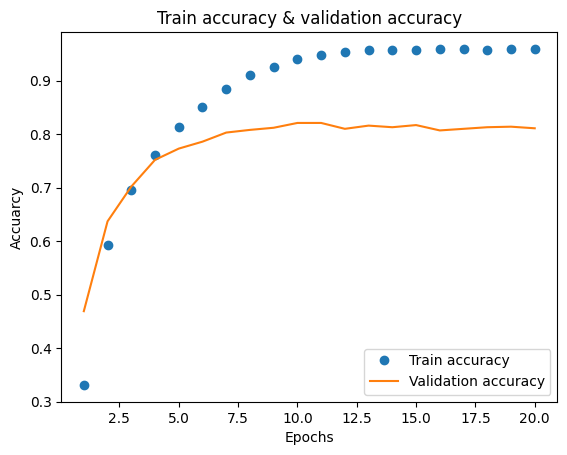

In [13]:
acc_plot(history_dict)

In [14]:
model.fit(X_train, y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 14ms/step - loss: 0.0969 - accuracy: 0.9614 - val_loss: 1.0472 - val_accuracy: 0.8160
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 0.0947 - accuracy: 0.9617 - val_loss: 1.1069 - val_accuracy: 0.7960
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 0.0911 - accuracy: 0.9618 - val_loss: 1.0710 - val_accuracy: 0.8150
Epoch 4/9
16/16 [==============================] - 0s 10ms/step - loss: 0.0898 - accuracy: 0.9619 - val_loss: 1.0801 - val_accuracy: 0.8090
Epoch 5/9
16/16 [==============================] - 0s 10ms/step - loss: 0.0886 - accuracy: 0.9632 - val_loss: 1.0980 - val_accuracy: 0.8130
Epoch 6/9
16/16 [==============================] - 0s 10ms/step - loss: 0.0926 - accuracy: 0.9632 - val_loss: 1.1186 - val_accuracy: 0.8060
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.0903 - accuracy: 0.9615 - val_loss: 1.1251 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [15]:
res = model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2206 - accuracy: 0.7939


In [16]:
pred = model.predict(X_test)

71/71 [==============================] - 0s 710us/step


In [17]:
len(pred[0]), np.argmax(pred[0]), np.sum(pred[0]) # hmm it should sum up to 1

(46, 3, 1.0)

Different options for labels:

In [18]:
y_train = np.array(y_train)
y_test = np.array(y_test)
# however, it is necessary to change the function of the loss
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])